In [22]:
#importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [67]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv'
data=pd.read_csv(url)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [70]:
#shape of tha data=
data.shape

(614, 13)

there are

614- rows

13- columns

In [71]:
#al the column names that are present in dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [72]:
#some information about datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


It gives us the basic information about dataset like null values in individual column or datatype of the respective column

as wee see there are  null values in this dataset and many columns datatype are object type which we need to convert into int or float as we cannot normalize the object dataype

In [73]:
#lets check one by one null values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in Gender, Married, Dependents, Self-Employed, LoanAmount, Loan_Amount_term,Credit_History column of dataet

In [74]:
#datatypes of each column i.e what type of data column held in 
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Datatypes of the individual column 

In [75]:
#lets summarize the dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


mean,std 1st quantile ,2 nd quantile and 3rd quentile of each column computed individually

In [76]:
#dropping the LoanID column as it is not useful to check weather a person gets the loan or not
data=data.drop(columns=['Loan_ID'])
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


we have deleted the loan id column from dataset as it no use to check the prediction

###### check every column one by one

In [77]:
#lets check the unique values in Gender Column
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

There are three types of values in it  

1. male
2. Female
3. nan= null values

as we already know nan means null values that means Gender column have null values lets treat them first

In [78]:
#lets check the null values in Gender Column
data['Gender'].isna().sum()

13

Total 13 null values present in Gender column

In [79]:
#lets count the values in Gender column
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

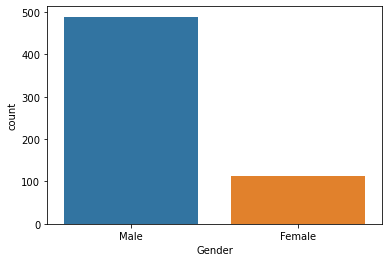

In [80]:
#lets plot the countplot for Gender column
sns.countplot(data['Gender'])
plt.show()

Count of Male values are way higher than the Count of Female values so the chances are higher that the maximum null values belongs to Male values so we change it to that

In [81]:
#lets fill the null values of Gender Column 
data['Gender']=data['Gender'].fillna('Male')
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


We have filled the null values of Gender column to the male values of Gender Column 

In [82]:
#lets again check the Null values of Gender column
data['Gender'].isna().sum()

0

now there are no null values in Gender column

Now we need to convert onject datatype to int datatype through Label encoder

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
#we are converting values of Gender column into int
lab1=LabelEncoder()  #instantiate
df1=lab1.fit_transform(data['Gender'])
data['Gender']=df1
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


afetr applying Label encoder on Gender column 

Male becomes-1

Female becomes-0

In [85]:
#lets see the count of Gender column
data['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

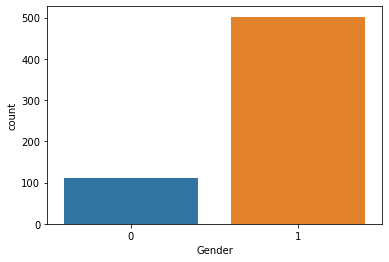

In [86]:
#lets plot countplot for Grnder value counts
sns.countplot(data['Gender'])
plt.show()

We have filled the null values of Gender Column and Encode through Label Encoder

In [87]:
#check the unique values of Married column
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

There three unique Values in Married column
 1. yes
 2. No
 3. nan
 
that means this column also contain some nan values

In [88]:
#lets check the null values in Married Column
data['Married'].isna().sum()

3

There are only three null values present in Married column

In [89]:
#lets check the value counts of Married column
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

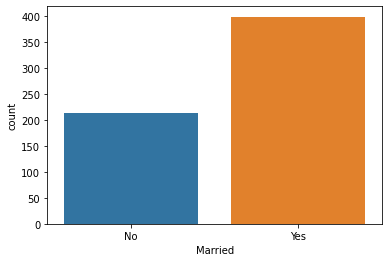

In [90]:
#lets plot the count plot for Married column
sns.countplot(data['Married'])
plt.show()

count of Married is higher than the non Married so there are high chances that the null values belongs to Married 

In [91]:
#lets fill the Married column null values
data['Married']=data['Married'].fillna('Yes')
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


we have filled the null values with Yes that means Married

In [92]:
#lets check the null values of Married column agian
data['Married'].isna().sum()

0

now there are no null values present in the Married column

In [93]:
#we are converting values of Married column into int
lab2=LabelEncoder()  #instantiate
df2=lab2.fit_transform(data['Married'])
data['Married']=df2
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


After Label encoding 

yes-1

No-0


In [94]:
#lets count the values agin
data['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

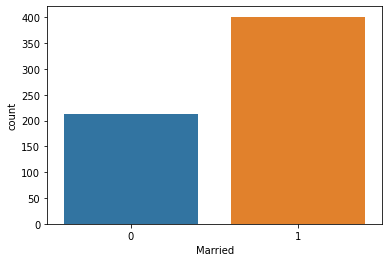

In [95]:
#lets plot the countplot for Married column
sns.countplot(data['Married'])
plt.show()

In [96]:
#lets check the unique values of Dependents column
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

There are 5 different values in Dependents column 0,1,2,3+ and nan

that means in this also there are null values

In [97]:
#leta check the null values in Dependents Column
data['Dependents'].isna().sum()

15

There are 15 null values present in the Dependents column

In [98]:
#lets check the value counts of Dependents column
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

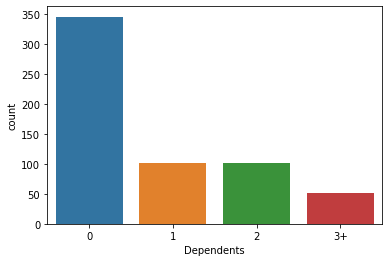

In [99]:
#lets plot the countplot for dependents column
sns.countplot(data['Dependents'])
plt.show()

value of 0 is higher than the any other values so there is high chances that the null values belongs to 0 value

In [100]:
#lets fill the dependents column
data['Dependents']=data['Dependents'].fillna(0)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [101]:
#again check the null values
data['Dependents'].isna().sum()

0

In [141]:
#again replace the 3+ str into 3
data['Dependents']=data['Dependents'].replace('3+',3)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


we have chnged thr 3+ string datatype to 3 make in int datatype

we have filled the null values of Dependent column

In [153]:
#we need to chnage the datatype of Dependents Column
data['Dependents']=data['Dependents'].astype(str).astype(int)
print(data.dtypes)

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
Dependets              int32
dtype: object


Education

In [102]:
#lets check the unique values of Education column
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

There are two values in Education column and there are no null values in it


In [103]:
#lets count the values of Education column
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

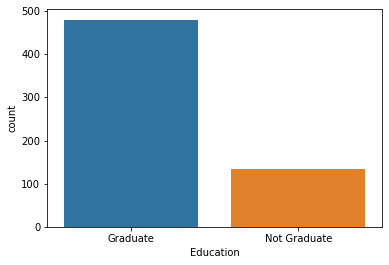

In [104]:
#lets plot the countplot for Education Column
sns.countplot(data['Education'])
plt.show()

In [105]:
#we are converting values of Education column into int
lab3=LabelEncoder()  #instantiate
df3=lab3.fit_transform(data['Education'])
data['Education']=df3
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,0,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,0,No,7583,0.0,187.0,360.0,1.0,Urban,Y


we have convert the Education column

1. Graduate-0
2. Not Graduate-1

In [106]:
#lets the unique values of self_employed column
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

There are three unique values yes , no, and nan

that means it contains null values in Self_Employed column

In [107]:
#lets check the null values in Self_Employed column
data['Self_Employed'].isna().sum()

32

There are 32 null values in Self_Employed column and we need to fill it with value

In [108]:
#lets check the value count of Self_Employed column
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

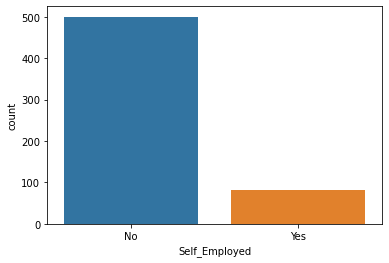

In [109]:
#lets plot the countplot for Self_Employed column
sns.countplot(data['Self_Employed'])
plt.show()

As we see the that No values are higher than the Yes so we will fill it with it with No values as the chances are higher that it belongs to No values

In [110]:
#fill the null values of Self_Employed column
data['Self_Employed']=data['Self_Employed'].fillna('No')
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,0,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,0,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [111]:
#now let see is there any null values in Self_Employed column
data['Self_Employed'].isna().sum()

0

we have filled the null values of Self_Employed column

In [112]:
#we are converting values of Self_Employed column into int
lab4=LabelEncoder()  #instantiate
df4=lab4.fit_transform(data['Self_Employed'])
data['Self_Employed']=df4
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,Y


After Label Encoding in Self_Employed column

no becaomes-0

yes becomes-1

In [113]:
#lets check the null values in ApplicantIncomecolumn
data['ApplicantIncome'].isna().sum()

0

no null values present in ApplicantIncome column

In [114]:
#lets check the CoapplicantIncome column null values
data['CoapplicantIncome'].isna().sum()

0

There are no null values so we proceed to another column

In [115]:
#lets check the null values in LoanAmount column
data['LoanAmount'].isna().sum()

22

There are 22 Null values present in LoanAmount column lets first treat this

In [116]:
#lets filled the null values to the mean of the LoanAmount column
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


We have filled the null values of LoanAmount column to thr mean value LoanAmount column 

In [117]:
#lets again check the null values of LoanAmount column
data['LoanAmount'].isna().sum()

0

Now there are no null values in LoanAmount column

In [118]:
#lets check the null values in Loan_Amount_Term column
data['Loan_Amount_Term'].isna().sum()

14

There are 14 null values present Loan_Amount_Term column we need to traet them first

In [119]:
#lets fill the null values of Loan_Amount_Term column to the mean of the same column
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


We have filled the null values of Loan_Amount_Term column to the mean of the same column we can't filled it with highest number value counts beacause there are lot of unique values so we filled it with mean of the column

In [120]:
#lets check the null values in Credit_History column
data['Credit_History'].isna().sum()

50

There are 50 null values in Credit_History column

In [121]:
#lets check the n=unique values of Credit_History column
data['Credit_History'].unique()

array([ 1.,  0., nan])

There are only three unique values which is 1., 0. and nan values

In [122]:
#lets check the value count of Credit_History column
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

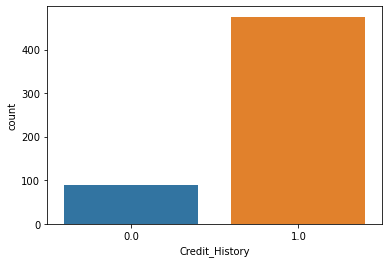

In [123]:
#lets plot the countplot for Credit_History column
sns.countplot(data['Credit_History'])
plt.show()

The value counts of 1. is way more higher than 0. so we fill the null values to 1. beacuse there are high chances that they belongs to 1.

In [124]:
#fill the null values of Credit_History column
data['Credit_History']=data['Credit_History'].fillna(1.0)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


we have filled the null values of Credit_History column to the 1.0 because the chances are higher that null values belongs to that

In [125]:
#again check the null values of Credit_History column
data['Credit_History'].isna().sum()

0

now there are no null values in Credit_History column

In [126]:
#again count the values of Credit_History column
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

The number of 1.0 increased because all the null values also added to it

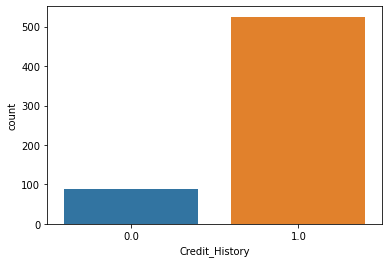

In [127]:
#lets again plot the countplot of Credit_History column
sns.countplot(data['Credit_History'])
plt.show()

In [128]:
#lets check the unique values in Property_Area column
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

There are only three unique values in Property_Area column

In [129]:
#lets check the null values of Property_Area column
data['Property_Area'].isna().sum()

0

no null values in Property_Area column

In [130]:
#encode the object to int datatype of Property_Area column
lab5=LabelEncoder()  #instantiate
df5=lab5.fit_transform(data['Property_Area'])
data['Property_Area']=df5
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


After Label Encoding 

1. Rural-0
2. Urban=2
3. semiurbsn-1

In [131]:
#lets the unique values of Loan_Status column
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

There are only two values weather the loan granted or not

In [132]:
#encode the Loan_Status column into 1 and 0
lab6=LabelEncoder()  #instantiate
df6=lab6.fit_transform(data['Loan_Status'])
data['Loan_Status']=df6
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


yes beacomes 1 and no becomes 0 after encoding

In [133]:
#lets check the datatypes of all the columns
data.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [135]:
#check the null values of data
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

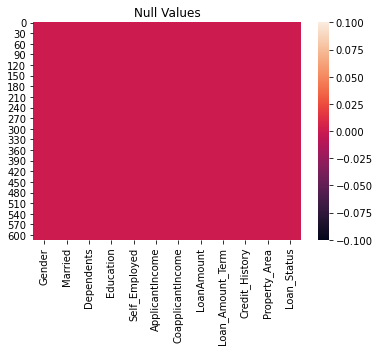

In [136]:
#lets check null values with heatmap alse
sns.heatmap(data.isna())
plt.title('Null Values')
plt.show()

Now there are no values in dataset we can proceed now

###### Normal Distribution

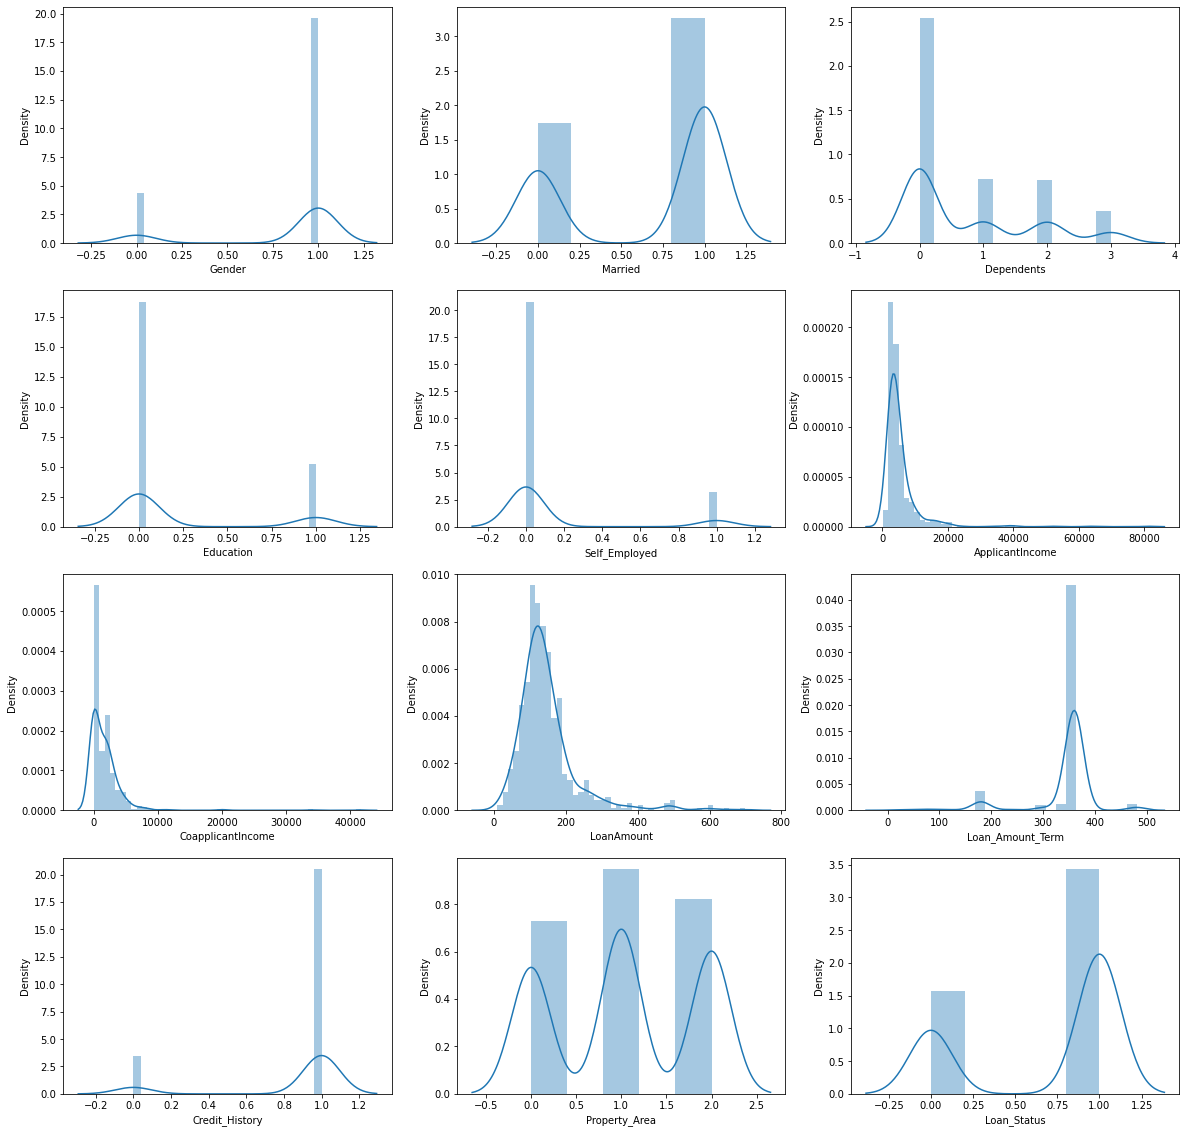

In [142]:
#lets check the normalization
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

as we see the data are noy normally distributed

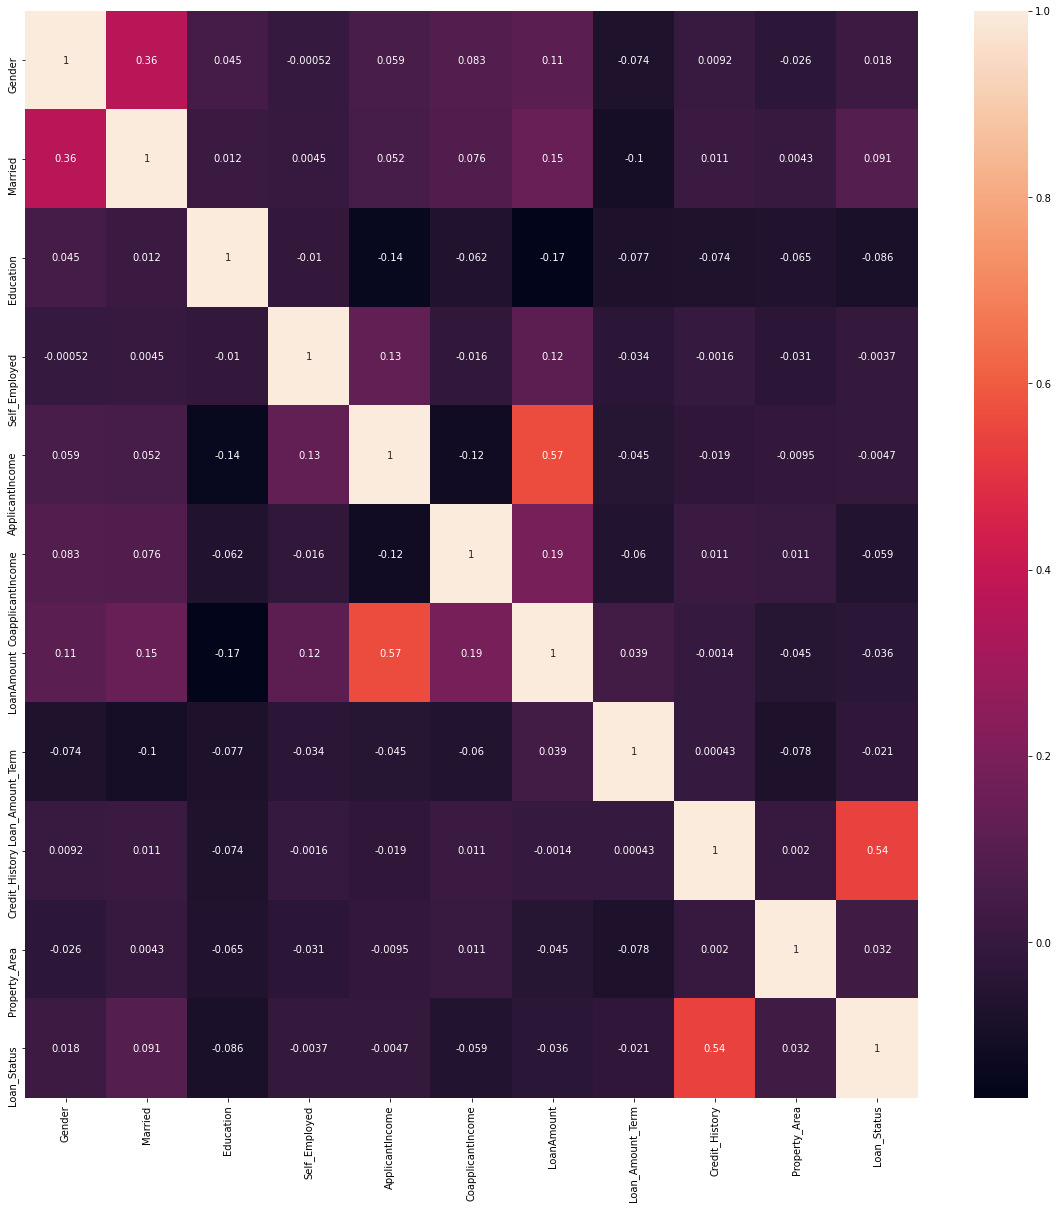

In [143]:
#checking correlation
plt.figure(figsize=(20,20))
data_corr=data.corr()
sns.heatmap(data_corr,annot=True,annot_kws={'size':10})
plt.show()

There are very less correlation or no correlation betewwn the column so can't decide on this delete any column

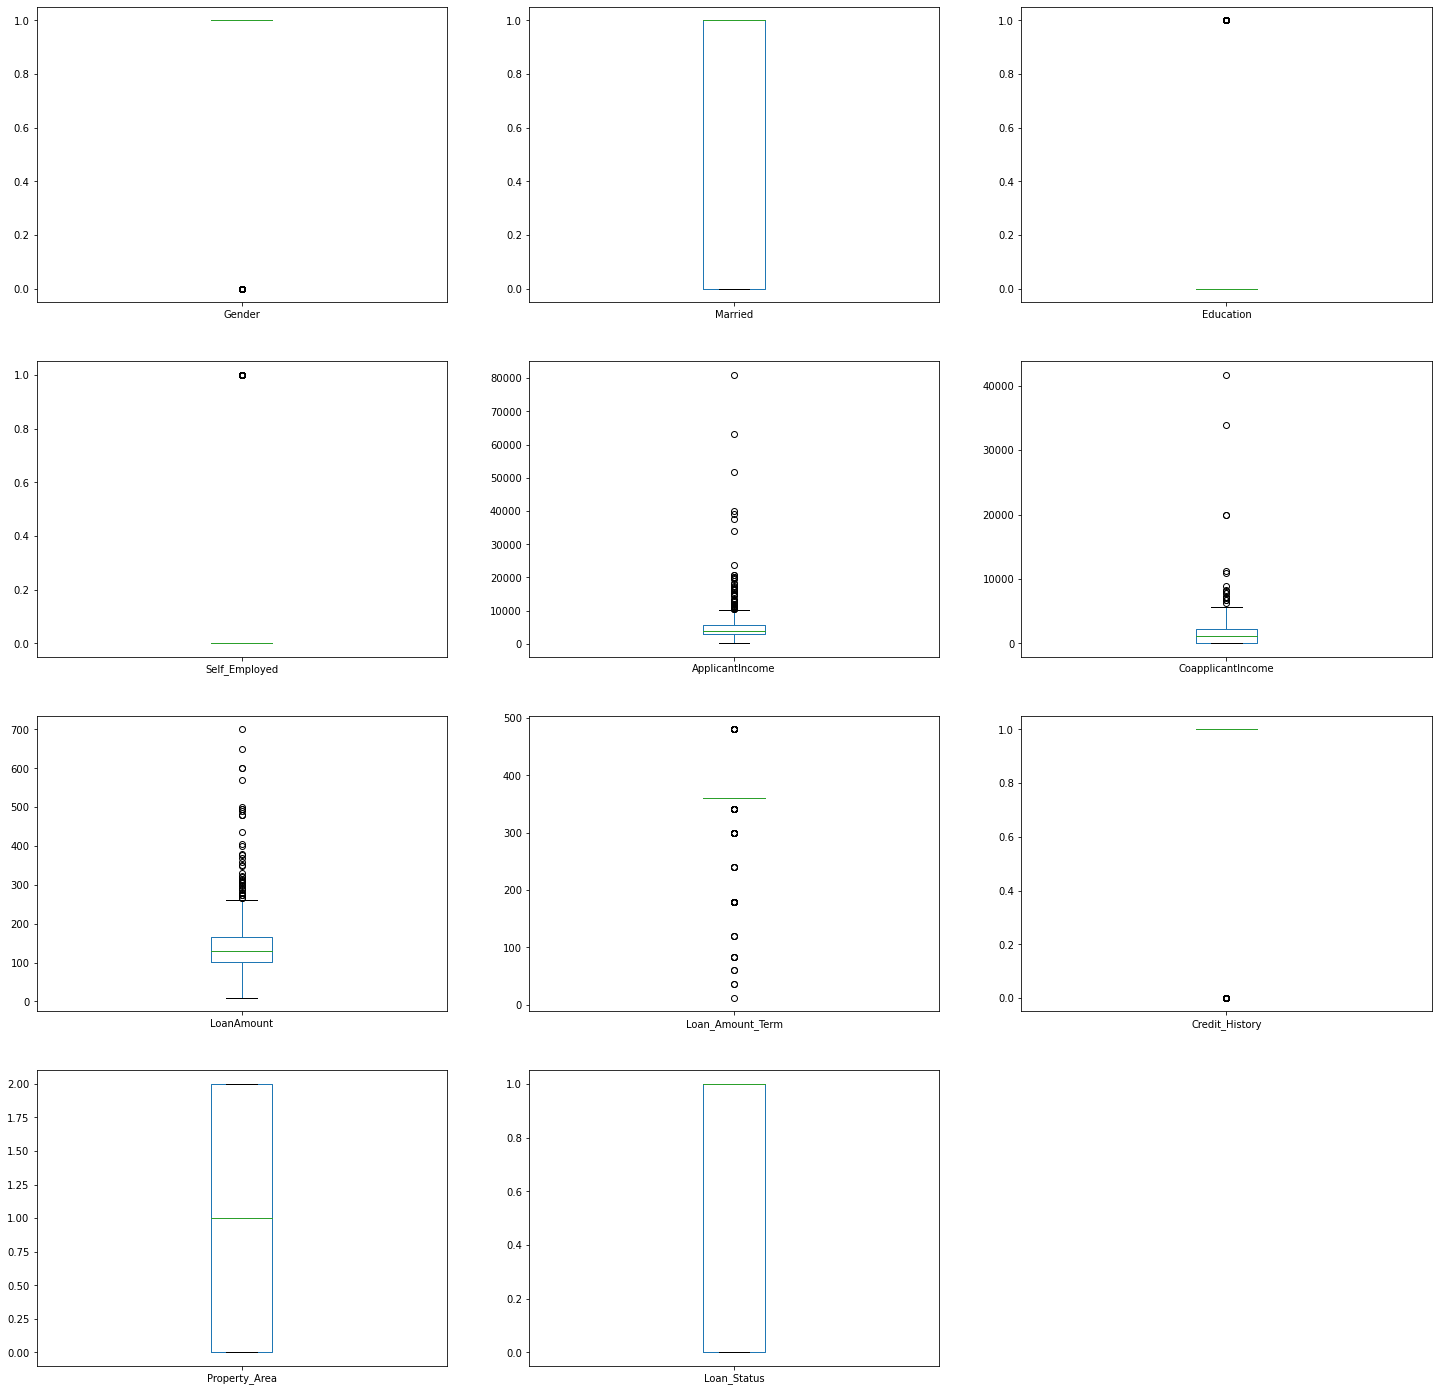

In [144]:
#plotting boxplot to check outliers
data.plot(kind='box',subplots = True,layout=(4,3),figsize = (25,25))
plt.show()

There is no much outliers in the column we need to solve it

In [155]:
#now check the skewness
data.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.671985
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
Dependets            1.015551
dtype: float64

the data is very much skewed in all the columns lets rectify it

In [161]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Education','Self_Employed','Dependents')
for col in skew:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])
    

In [162]:
#again check skewness of data
data.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.535783
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.168100
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
Dependets            1.015551
dtype: float64

In [163]:
#calculate the zscore
from scipy.stats import zscore

In [164]:
z=np.abs(zscore(data))
z

array([[0.47234264, 1.37208932, 0.81322769, ..., 1.22329839, 0.67451931,
        0.73780632],
       [0.47234264, 0.72881553, 0.70718811, ..., 1.31851281, 1.48253724,
        0.25346957],
       [0.47234264, 0.72881553, 0.81322769, ..., 1.22329839, 0.67451931,
        0.73780632],
       ...,
       [0.47234264, 0.72881553, 0.70718811, ..., 1.22329839, 0.67451931,
        0.25346957],
       [0.47234264, 0.72881553, 1.32705276, ..., 1.22329839, 0.67451931,
        1.24474546],
       [2.11710719, 1.37208932, 0.81322769, ..., 0.04760721, 1.48253724,
        0.73780632]])

In [165]:
print(np.where(z<3))

print('shape of the data before using z csore is :\n',data.shape)

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))
shape of the data before using z csore is :
 (614, 13)


In [166]:
data_new=data[(z<3).all(axis=1)]

In [167]:
print('Shape of Original dataset',data.shape)
print('Shape of outliers dataset',data_new.shape)
data=data_new
print('Shape after removing outliers', data.shape)

Shape of Original dataset (614, 13)
Shape of outliers dataset (586, 13)
Shape after removing outliers (586, 13)


## again check the outliers
data.plot(kind='box',subplots = True,layout=(2,7),figsize = (25,25))
plt.show()

In [171]:
#again check the skewness
data.skew()

Gender              -1.677392
Married             -0.639274
Dependents           0.557246
Education            1.342386
Self_Employed        2.232849
ApplicantIncome      0.525394
CoapplicantIncome   -0.187326
LoanAmount           0.026468
Loan_Amount_Term    -2.154619
Credit_History      -1.982445
Property_Area       -0.060359
Loan_Status         -0.803616
Dependets            1.033242
dtype: float64

In [172]:
z1=np.abs(zscore(data))
z1

array([[0.46722074, 1.36841113, 0.80402454, ..., 1.2266609 , 0.67654375,
        0.73075005],
       [0.46722074, 0.73077453, 0.72312069, ..., 1.31335071, 1.47810101,
        0.26976287],
       [0.46722074, 0.73077453, 0.80402454, ..., 1.2266609 , 0.67654375,
        0.73075005],
       ...,
       [0.46722074, 0.73077453, 0.72312069, ..., 1.2266609 , 0.67654375,
        0.26976287],
       [0.46722074, 0.73077453, 1.34572889, ..., 1.2266609 , 0.67654375,
        1.27027579],
       [2.14031595, 1.36841113, 0.80402454, ..., 0.04334491, 1.47810101,
        0.73075005]])

In [173]:
print(np.where(z1<3))

print('shape of the data before using z csore is :\n',data.shape)

(array([  0,   0,   0, ..., 585, 585, 585], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))
shape of the data before using z csore is :
 (586, 13)


In [174]:
data_new=data[(z1<3).all(axis=1)]

In [175]:
print('Shape of Original dataset',data.shape)
print('Shape of outliers dataset',data_new.shape)
data=data_new
print('Shape after removing outliers', data.shape)

Shape of Original dataset (586, 13)
Shape of outliers dataset (539, 13)
Shape after removing outliers (539, 13)


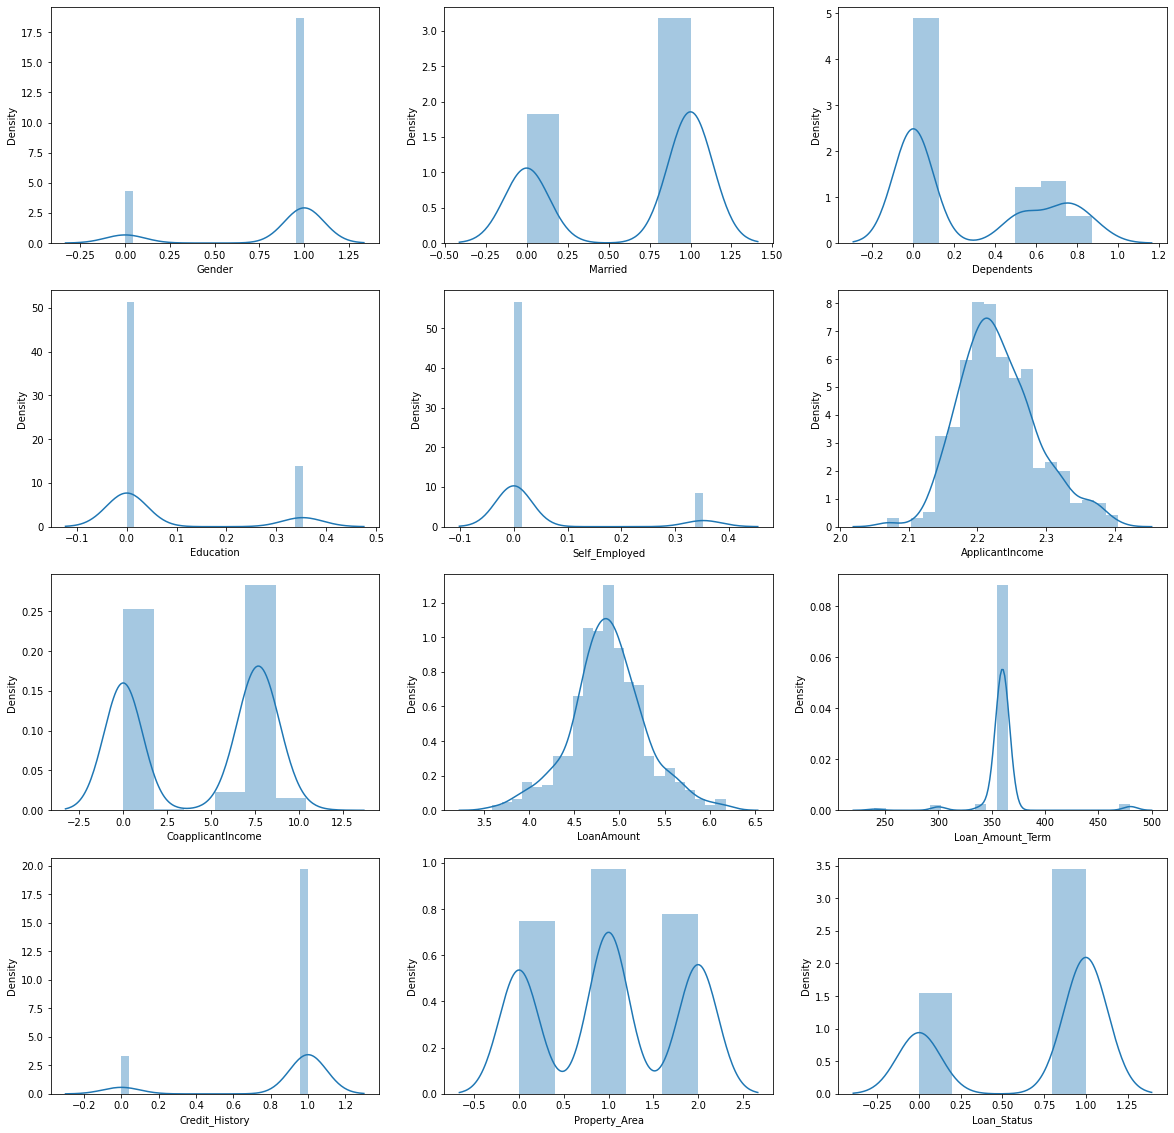

In [176]:
#again check the normal distribution
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

which have comtinuous values are normal distributed but the values of 0,1,2 are not they can never be

###### Splitting the data


In [177]:
x=data.drop(columns=['Loan_Status'])
y=data['Loan_Status']

In [178]:
#check shape of x and y 
print('Shape of x is :',x.shape,'\n\n') 
print('Shape of y is :',y.shape,'\n\n')


Shape of x is : (539, 12) 


Shape of y is : (539,) 




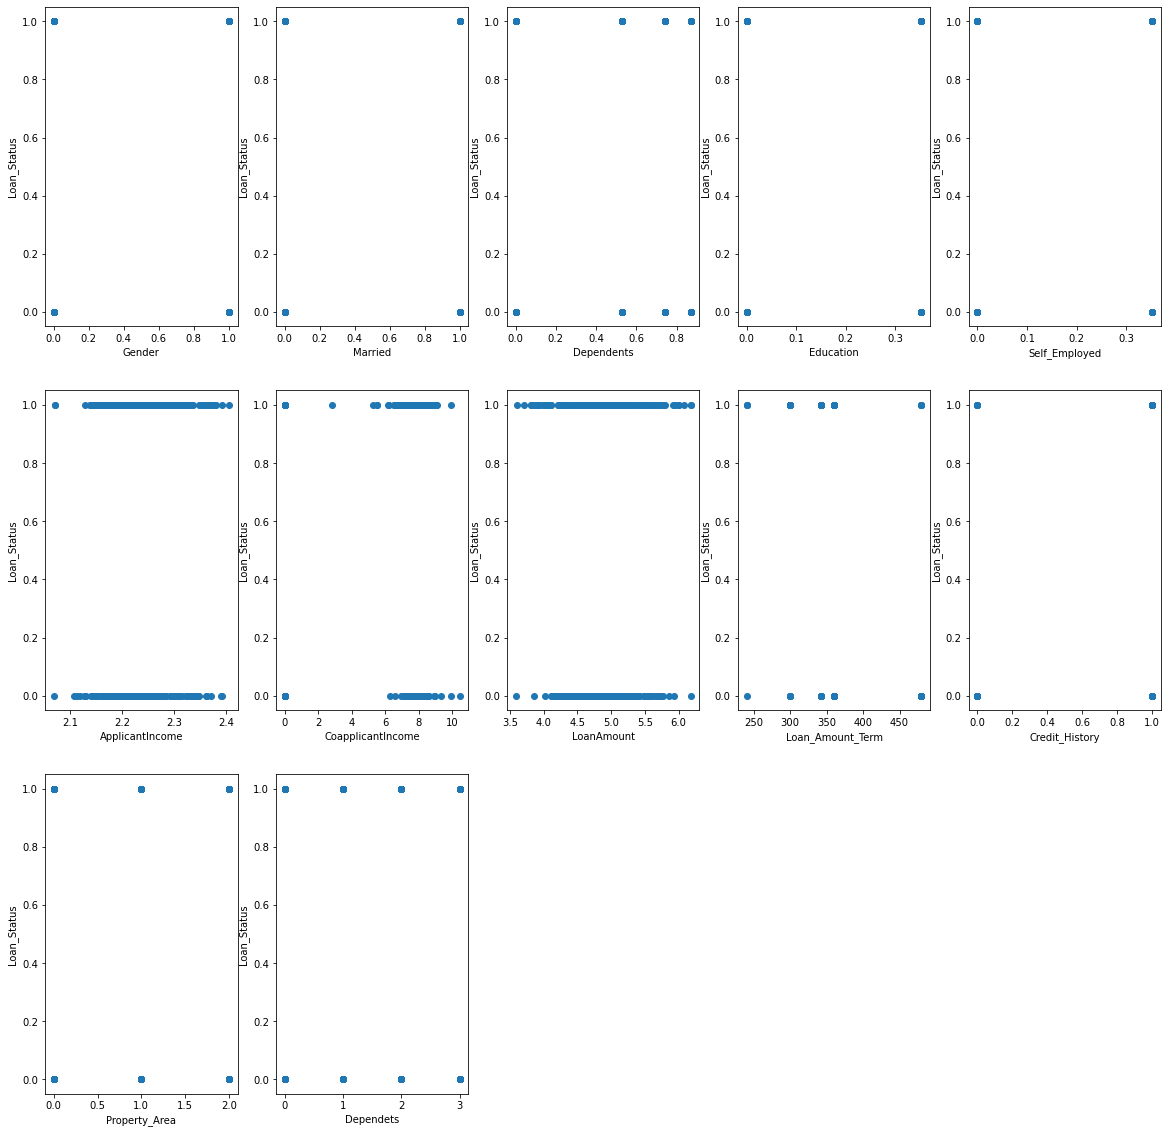

In [179]:
#check relationship between x and y 
plt.figure(figsize=(20,20))
plotnumber=1
for column in x:
    if plotnumber<=16:
        ax=plt.subplot(3,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Loan_Status')
    plotnumber+=1
plt.show()

Columns are directly or indirectly related there are relstionship between x and y

In [180]:
#importing standard scler to scale the x 
from sklearn.preprocessing import StandardScaler

In [182]:
s1=StandardScaler()  #instantiate
scaled1=s1.fit_transform(x)
scaled1.shape[1]

12

In [183]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [184]:
x_train,x_test,y_train,y_test=train_test_split(scaled1,y,test_size=0.40,random_state=123)

###### 1st Model Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [186]:
lr=LogisticRegression()  #instantiate
lr.fit(x_train,y_train)

LogisticRegression()

In [187]:
#Trainig Accuracy of Logistic Regression Model
lr.score(x_train,y_train)

0.7894736842105263

In [188]:
y_pred_lr=lr.predict(x_test)

In [192]:
#testing accuracy of Logistic Regression Model
accuracy_score(y_test,y_pred_lr)

0.8564814814814815

Training score of Logictis Regression Model- 78%

Testing score of Logictis Regression Model- 85%

In [193]:
#confusion matric of logistic Regression Model
confusion_matrix(y_test,y_pred_lr)

array([[ 28,  31],
       [  0, 157]], dtype=int64)

1. True Positive-28
2. False Positive-31
3. true negativ-0
4. false negative-157

In [195]:
#classification report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        59
           1       0.84      1.00      0.91       157

    accuracy                           0.86       216
   macro avg       0.92      0.74      0.78       216
weighted avg       0.88      0.86      0.84       216



all the score are given in classification report

In [200]:
#plt_roc_curve for Logistic Regression Model
fpr,tpr,thresholds=roc_curve(y_test,y_pred_lr)

In [202]:
print('False Positive Rates are :',fpr)
print('True Positive Rates are :',tpr)
print('Thresholds are :',thresholds)

False Positive Rates are : [0.         0.52542373 1.        ]
True Positive Rates are : [0. 1. 1.]
Thresholds are : [2 1 0]


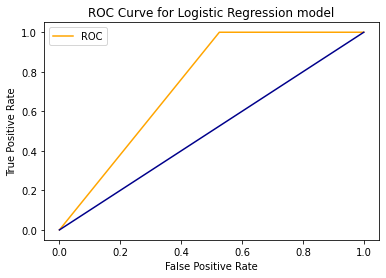

In [208]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression model')
plt.legend()
plt.show()

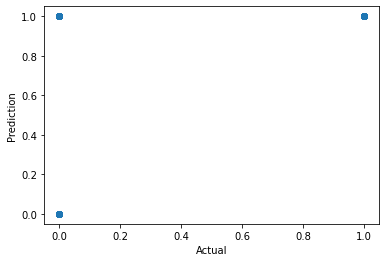

In [210]:
#conclusion of Logistic Regression Model
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

###### 2nd Model KNN Model

In [212]:
from sklearn.neighbors import KNeighborsClassifier

In [213]:
knn=KNeighborsClassifier()  #instantiate
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [214]:
#Training accuracy of KNN model
knn.score(x_train,y_train)


0.7987616099071208

In [215]:
y_pred_knn=knn.predict(x_test)

In [217]:
#Testing accuracy of KNN Model
accuracy_score(y_test,y_pred_knn)

0.8101851851851852

Training Accuracy of KNN Model -79%

Testing Accuracy of KNN Model -81%


In [218]:
from sklearn.feature_selection import SelectKBest,f_classif


###### Hyperparameter Tuning for KNN Model

In [219]:
#select best features
best_features=SelectKBest(score_func=f_classif,k=7)
fit=best_features.fit(x,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)
#concatenate
feature_scores=pd.concat([data_columns,data_scores], axis=1)
feature_scores.columns=['Feature_Name','score']
print(feature_scores.nlargest(7,'score'))

         Feature_Name       score
9      Credit_History  235.310323
6   CoapplicantIncome    5.329835
1             Married    4.789125
8    Loan_Amount_Term    4.317130
3           Education    2.322203
10      Property_Area    0.539597
7          LoanAmount    0.502012


In [220]:
#Model Building
new_x=data[['Credit_History','CoapplicantIncome','Married','Loan_Amount_Term','Education','Property_Area','LoanAmount']]
new_x

,Credit_History,CoapplicantIncome,Married,Loan_Amount_Term,Education,Property_Area,LoanAmount
0,1.0,0.000000,0,360.0,0.000000,2,4.993232
1,1.0,7.319202,1,360.0,0.000000,0,4.859812
2,1.0,0.000000,1,360.0,0.000000,2,4.204693
3,1.0,7.765993,1,360.0,0.352793,2,4.795791
4,1.0,0.000000,0,360.0,0.000000,2,4.955827
...,...,...,...,...,...,...,...
608,1.0,7.576097,1,360.0,0.000000,0,4.691348
609,1.0,0.000000,0,360.0,0.000000,0,4.276666
611,1.0,5.484797,1,360.0,0.000000,2,5.537334
612,1.0,0.000000,1,360.0,0.000000,2,5.236442


In [221]:
#scalling the new x
scaler=StandardScaler()
scaled_new_x=scaler.fit_transform(new_x)
scaled_new_x

array([[ 0.40824829, -1.1192908 , -1.32287566, ..., -0.51791437,
         1.26351183,  0.28215187],
       [ 0.40824829,  0.78020151,  0.75592895, ..., -0.51791437,
        -1.29676214, -0.03637028],
       [ 0.40824829, -1.1192908 ,  0.75592895, ..., -0.51791437,
         1.26351183, -1.60037889],
       ...,
       [ 0.40824829,  0.30413336,  0.75592895, ..., -0.51791437,
         1.26351183,  1.58112022],
       [ 0.40824829, -1.1192908 ,  0.75592895, ..., -0.51791437,
         1.26351183,  0.86278112],
       [-2.44948974, -1.1192908 , -1.32287566, ..., -0.51791437,
        -0.01662516,  0.05441491]])

In [223]:
#again instantiating for hyperparameter tuning
knn1=KNeighborsClassifier()
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [224]:
y_pred_knn1=knn1.predict(x_test)

In [225]:
#accuracy of training data
knn1.score(x_train,y_train)

0.7987616099071208

In [226]:
#Testing Score of KNN Model after Hyperparameter 
accuracy_score(y_test,y_pred_knn1)

0.8101851851851852

after hyperparameter tuning also te accuracy remains the same 81%

In [227]:
#confusion matric of KNN Model
confusion_matrix(y_test,y_pred_knn)

array([[ 30,  29],
       [ 12, 145]], dtype=int64)

In [228]:
#classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.51      0.59        59
           1       0.83      0.92      0.88       157

    accuracy                           0.81       216
   macro avg       0.77      0.72      0.74       216
weighted avg       0.80      0.81      0.80       216



In [229]:
#plt_roc_curve for Logistic Regression Model
fpr1,tpr1,thresholds1=roc_curve(y_test,y_pred_knn)

In [230]:
print('False Positive Rates are :',fpr1)
print('True Positive Rates are :',tpr1)
print('Thresholds are :',thresholds1)

False Positive Rates are : [0.         0.49152542 1.        ]
True Positive Rates are : [0.         0.92356688 1.        ]
Thresholds are : [2 1 0]


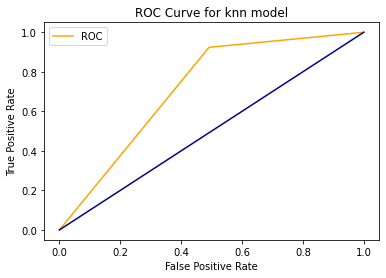

In [231]:
plt.plot(fpr1,tpr1,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for knn model')
plt.legend()
plt.show()

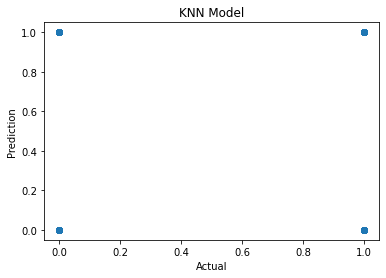

In [233]:
#conclusions of KNN Model
plt.scatter(y_test,y_pred_knn)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('KNN Model')
plt.show()

###### 3rd Model Decision Tree Classifier Model

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
dt=DecisionTreeClassifier()  #instantiate
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [236]:
#Training score of Decision tree Model
dt.score(x_train,y_train)

1.0

In [237]:
y_pred_dt=dt.predict(x_test)

In [238]:
#Accuracy of testing data
accuracy_score(y_test,y_pred_dt)

0.7592592592592593

Training score of Decision Tree Model is 100%

Testing Score of Decision Tree Model is  75%

###### Hyperparameter tuning for Decision Tree Model

In [239]:
grid_params1={'max_depth':[1,2,3,4,5,6,7,8],
              'min_samples_leaf':[1,2,3,4,5,6,7,8],
               'max_features':['auto','log2','sqrt',None],
               'max_leaf_nodes':[1,2,3,4,5,6,7,8]}
print(grid_params1)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8], 'max_features': ['auto', 'log2', 'sqrt', None], 'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8]}


In [242]:
from sklearn.model_selection import GridSearchCV
grid_dt=GridSearchCV(dt,param_grid=grid_params1,cv=3,verbose=3)

In [243]:
grid_dt.fit(x_train,y_train)

Fitting 3 folds for each of 2048 candidates, totalling 6144 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=5, min_samples_leaf=1;

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=7;

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=4, min_samples_leaf=6;

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=8, min_samples_leaf=2;

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5;

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=2;

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=3, min_samples_leaf=7;

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=7, min_samples_leaf=4;

[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4;

[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4;

[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4;

[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7;

[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3;

[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4;

[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=3, min_samples_leaf=1;

[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=6, min_samples_leaf=5;

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4;

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8;

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1;

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1;

[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8;

[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=3;

[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=6;

[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=7, min_samples_leaf=3;

[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=7;

[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8;

[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2;

[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6;

[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4;

[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=7;

[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=3, min_samples_leaf=4;

[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=7, min_samples_leaf=3;

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1;

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5;

[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3;

[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2;

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2;

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5;

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=2, min_samples_leaf=3;

[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=3;

[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=6;

[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4;

[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=7;

[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=6, min_samples_leaf=2;

[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=3;

[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4;

[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=2, min_samples_leaf=1;

[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=4;

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=2, min_samples_leaf=6;

[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5;

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=5;

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2;

[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4;

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=2;

[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=7;

[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=7, min_samples_leaf=8;

[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6;

[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=3;

[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4;

[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=7, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=7, min_samples_leaf=8;

[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=2;

[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=3, min_samples_leaf=2;

[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=6, min_samples_leaf=6;

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]},
             verbose=3)

In [244]:
# best hyperparameters 
grid_dt.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1}

In [245]:
#best aparameter model score
grid_dt.best_score_

0.7894311757240106

In [248]:
#traininf decision tree with hyperparameter feature
dt_hyp=DecisionTreeClassifier(max_depth = 2,max_features= 'log2',max_leaf_nodes = 3,min_samples_leaf= 1)

In [249]:
#noe fitting decsiontree hyperparameter
dt_hyp.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features='log2', max_leaf_nodes=3)

In [250]:
y_pred_dt1=dt_hyp.predict(x_test)

In [251]:
#trainig accuracy of hyperparameter of Dt model
dt_hyp.score(x_train,y_train)

0.6780185758513931

In [252]:
#Testing score of Decision Tree Model after Hyperparameter
accuracy_score(y_test,y_pred_dt1)

0.7222222222222222

after hyperparameter tuning the accuracy decresed 75% to 72%

so we stick ti without tuning model

In [253]:
#confusion matric of KNN Model
confusion_matrix(y_test,y_pred_dt)

array([[ 37,  22],
       [ 30, 127]], dtype=int64)

In [255]:
#Classification report of Deciison Tree Model
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.55      0.63      0.59        59
           1       0.85      0.81      0.83       157

    accuracy                           0.76       216
   macro avg       0.70      0.72      0.71       216
weighted avg       0.77      0.76      0.76       216



In [256]:
#plot roc curve for Decision Tree Model
fpr2,tpr2,thresholds2=roc_curve(y_test,y_pred_dt)

In [257]:
print('False Positive Rates are :',fpr2)
print('True Positive Rates are :',tpr2)
print('Thresholds are :',thresholds2)

False Positive Rates are : [0.         0.37288136 1.        ]
True Positive Rates are : [0.        0.8089172 1.       ]
Thresholds are : [2 1 0]


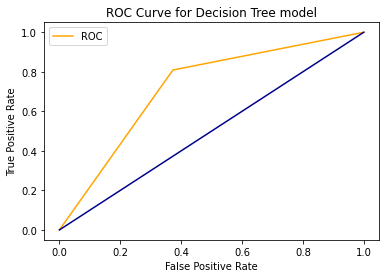

In [258]:
plt.plot(fpr2,tpr2,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree model')
plt.legend()
plt.show()

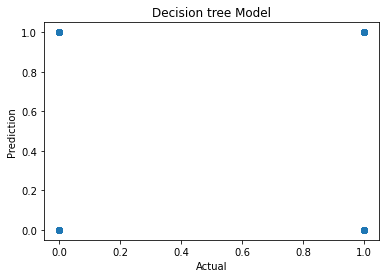

In [260]:
#conclusion for Decision Tree Model
plt.scatter(y_test,y_pred_dt)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Decision tree Model')
plt.show()

###### 4th Model Random Forest Classifier Model

In [261]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
rf=RandomForestClassifier()  #instantiate
rf.fit(x_train,y_train)

RandomForestClassifier()

In [263]:
#Training score of Random Forest Classifier Model
rf.score(x_train,y_train)

1.0

In [264]:
y_pred_rf=rf.predict(x_test)

In [265]:
#Testing score of Random Forest Model
accuracy_score(y_test,y_pred_rf)

0.8425925925925926

###### Hyperparameter Tuning for Random Forest Model

In [266]:
params={'n_estimators':[13,15],
       'criterion':['entropy'],
       'max_depth':[10,15],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6]
       }

grd=GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=>',grd.best_params_)

rf=grd.best_estimator_

rf.fit(x_train,y_train)
y_pred_rf1=rf.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred_rf1)

print('\ncon_mat','\n',rf_conf_mat)
print('\n Accuracy rf normal',accuracy_score(y_test,y_pred_rf1))

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}

con_mat 
 [[ 28  31]
 [  5 152]]

 Accuracy rf normal 0.8333333333333334


In [268]:
accuracy_score(y_test,y_pred_rf1)

0.8333333333333334

after tuning the Random Forest Model the accuracy decreases from 1% so we stick to without tuning model

In [269]:
#plot roc curve for Decision Tree Model
fpr3,tpr3,thresholds3=roc_curve(y_test,y_pred_rf)

In [270]:
print('False Positive Rates are :',fpr3)
print('True Positive Rates are :',tpr3)
print('Thresholds are :',thresholds3)

False Positive Rates are : [0.         0.47457627 1.        ]
True Positive Rates are : [0.         0.96178344 1.        ]
Thresholds are : [2 1 0]


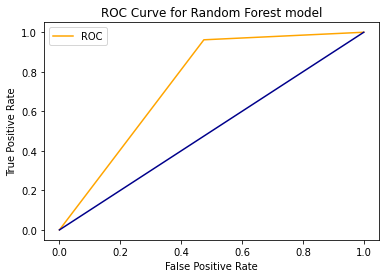

In [271]:
plt.plot(fpr3,tpr3,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest model')
plt.legend()
plt.show()

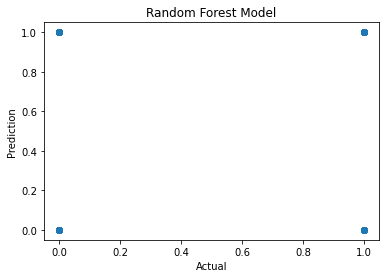

In [272]:
#conclusions of Random Forest Model
plt.scatter(y_test,y_pred_rf)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Random Forest Model')
plt.show()

###### plot_roc_curve for fitted model

In [274]:
#training with all classifier
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)

print('All Models are trained')

All Models are trained


In [276]:
#all models scores are captured
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
knn.score(x_test,y_test)

print('All Models test score captured')

All Models test score captured


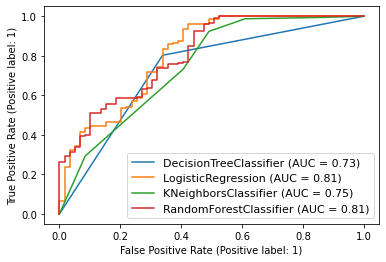

In [277]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()      

Random Forest and Logistic Regression  model gives better Accuracy 81 % ,
so we save either with Logistic or Random Forest Model

In [278]:
import pickle

In [279]:
filename='loan_status.pkl'

In [280]:
pickle.dump=(rf,open('loan_status.pkl','wb'))